<a href="https://colab.research.google.com/github/summiya894/DSA_FAO/blob/main/fertilizerproduct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset with a specific encoding
df = pd.read_csv("/content/FertilizersProduct.csv", encoding="latin-1")


df.head(6)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R
5,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2017,2017,1000 US$,1.24,R


In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Get basic information about the dataset
print(df.info())

# Summary statistics of numeric columns
print(df.describe())


   Area Code         Area  Item Code                Item  Element Code  \
0          2  Afghanistan       4007  Ammonia, anhydrous          5610   
1          2  Afghanistan       4007  Ammonia, anhydrous          5610   
2          2  Afghanistan       4007  Ammonia, anhydrous          5610   
3          2  Afghanistan       4007  Ammonia, anhydrous          5622   
4          2  Afghanistan       4007  Ammonia, anhydrous          5622   

           Element  Year Code  Year      Unit  Value Flag  
0  Import Quantity       2011  2011    tonnes   4.49    R  
1  Import Quantity       2014  2014    tonnes   2.00    R  
2  Import Quantity       2017  2017    tonnes   2.07    R  
3     Import Value       2011  2011  1000 US$   2.69    R  
4     Import Value       2014  2014  1000 US$   1.07    R  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164468 entries, 0 to 164467
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   ----

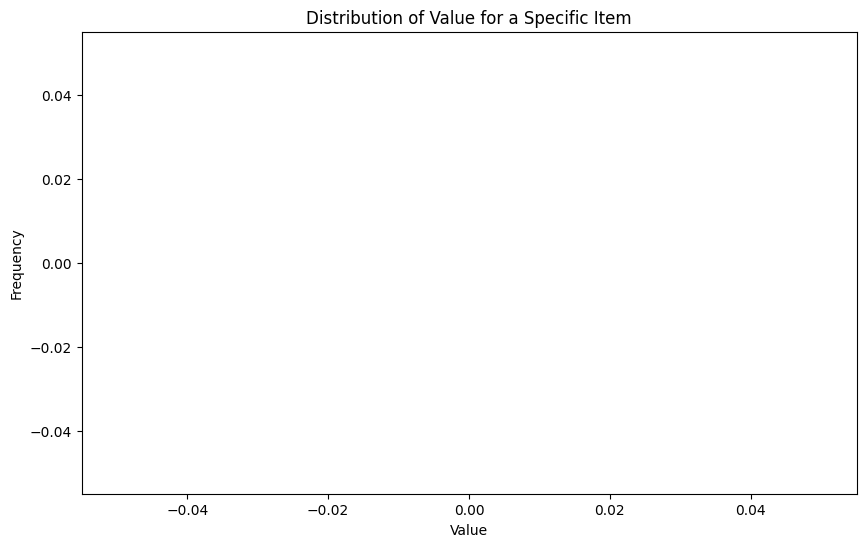

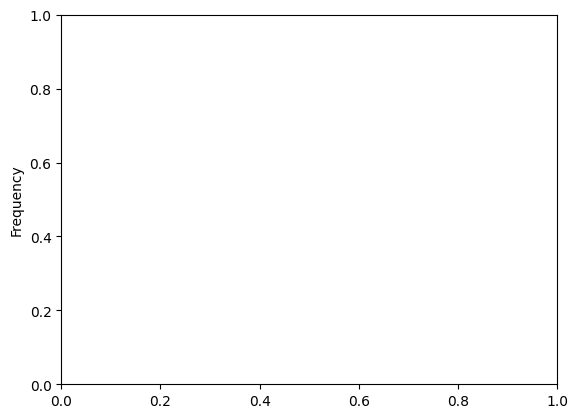

In [ ]:

# Visualize the distribution of 'Value' for a specific 'Item'
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Item'] == 'Your_Item_Name'], x='Value', bins=20, kde=True)
plt.title('Distribution of Value for a Specific Item')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
plt.ylabel('Frequency')
plt.show()



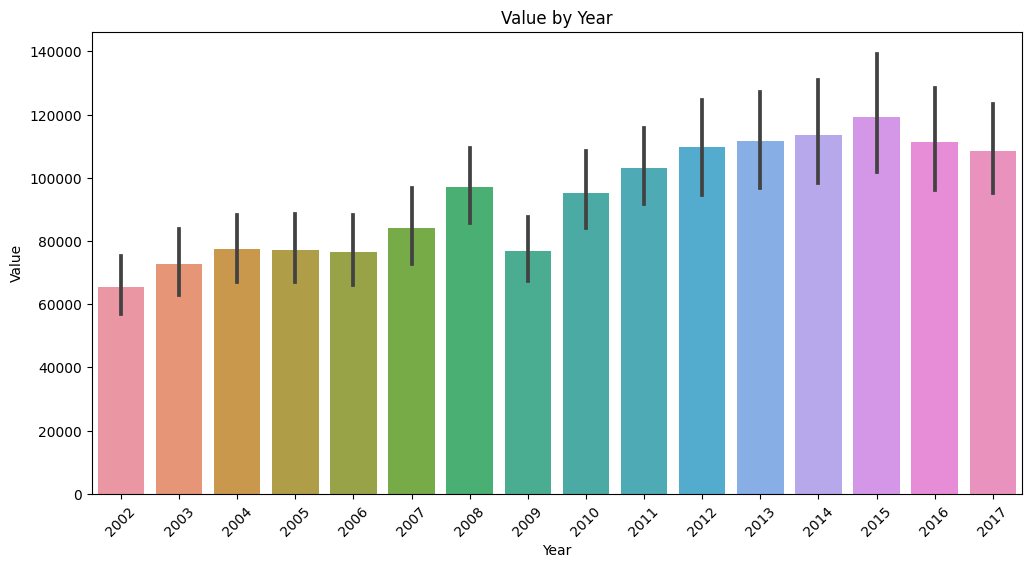

In [ ]:
# Create a bar plot of 'Value' by 'Year'
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Year', y='Value')
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

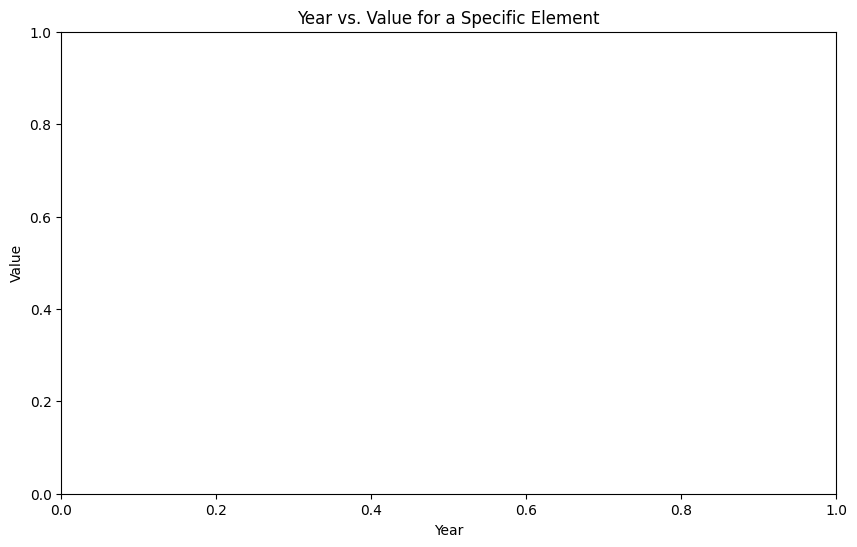

In [ ]:
# Create a scatter plot of 'Year' vs. 'Value' for a specific 'Element'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['Element'] == 'Your_Element_Name'], x='Year', y='Value')
plt.title('Year vs. Value for a Specific Element')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

##feature engineering

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming you've already loaded the dataset into a DataFrame called 'df'

# Feature extraction: Extract month and year from the 'Year' column
df['Month'] = pd.to_datetime(df['Year'], format='%Y').dt.month
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# One-hot encode the 'Item' and 'Element' columns
df = pd.get_dummies(df, columns=['Item', 'Element'], prefix=['item', 'element'])

# Min-max scaling for the 'Value' column
scaler = MinMaxScaler()
df['Value'] = scaler.fit_transform(df[['Value']])

# Feature aggregation: Calculate the annual average 'Value'
annual_average = df.groupby('Year')['Value'].mean().reset_index()
annual_average.rename(columns={'Value': 'Annual_Average_Value'}, inplace=True)
df = df.merge(annual_average, on='Year', how='left')

# Binning 'Value' into categories
bins = [0, 0.2, 0.8, 1]
labels = ['Low', 'Medium', 'High']
df['Value_Category'] = pd.cut(df['Value'], bins=bins, labels=labels)

# Standardize numeric features 'Value' and 'Year'
scaler = StandardScaler()
df[['Value', 'Year']] = scaler.fit_transform(df[['Value', 'Year']])

# Display the updated DataFrame
print(df.head())


   Area Code         Area  Item Code  Element Code  Year Code      Year  \
0          2  Afghanistan       4007          5610       2011  0.278648   
1          2  Afghanistan       4007          5610       2014  0.939015   
2          2  Afghanistan       4007          5610       2017  1.599383   
3          2  Afghanistan       4007          5622       2011  0.278648   
4          2  Afghanistan       4007          5622       2014  0.939015   

       Unit     Value Flag  Month  ...  item_Urea  \
0    tonnes -0.136898    R      1  ...          0   
1    tonnes -0.136901    R      1  ...          0   
2    tonnes -0.136901    R      1  ...          0   
3  1000 US$ -0.136900    R      1  ...          0   
4  1000 US$ -0.136903    R      1  ...          0   

   item_Urea and ammonium nitrate solutions (UAN)  element_Agricultural Use  \
0                                               0                         0   
1                                               0                       

##predictive model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you've already loaded and preprocessed your dataset into a DataFrame 'df'

# Define your target variable ('Value' in this case) and features (independent variables)
target_variable = 'Value'
features = ['Year', 'Month', 'Element Code', 'Item Code']

# Split the data into training and testing sets
X = df[features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)


Mean Squared Error: 1.0054355961802597
R-squared (R2): 0.00652209650437352


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you've already loaded and preprocessed your dataset into a DataFrame 'df'

# Define your target variable ('Value' in this case) and features (independent variables)
target_variable = 'Value'
features = ['Year', 'Month','Element Code', 'Item Code']  # Replace with your actual feature names

# Split the data into training and testing sets
X = df[features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)


Mean Squared Error: 0.9831119416690957
R-squared (R2): 0.028580254745804612


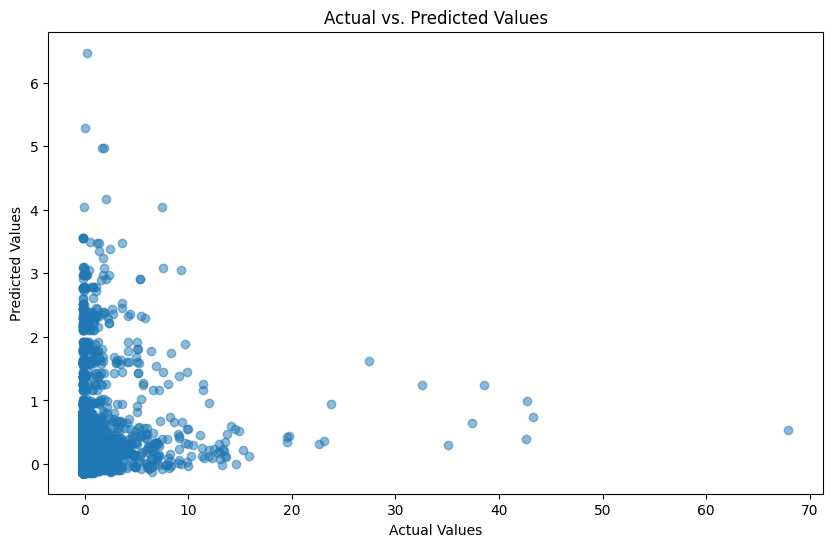

In [ ]:
# Create visualizations
# 1. Actual vs. Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


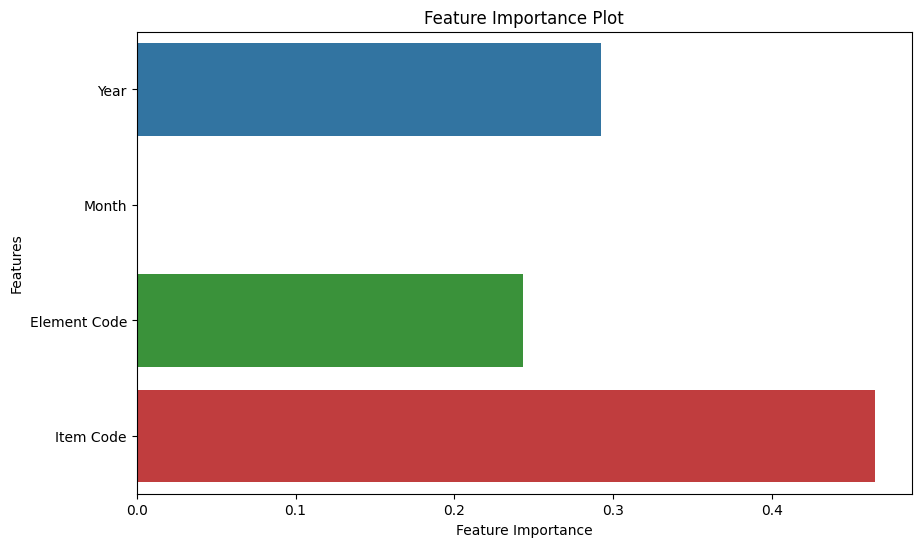

In [ ]:
# 3. Feature Importance Plot (for Random Forest)
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


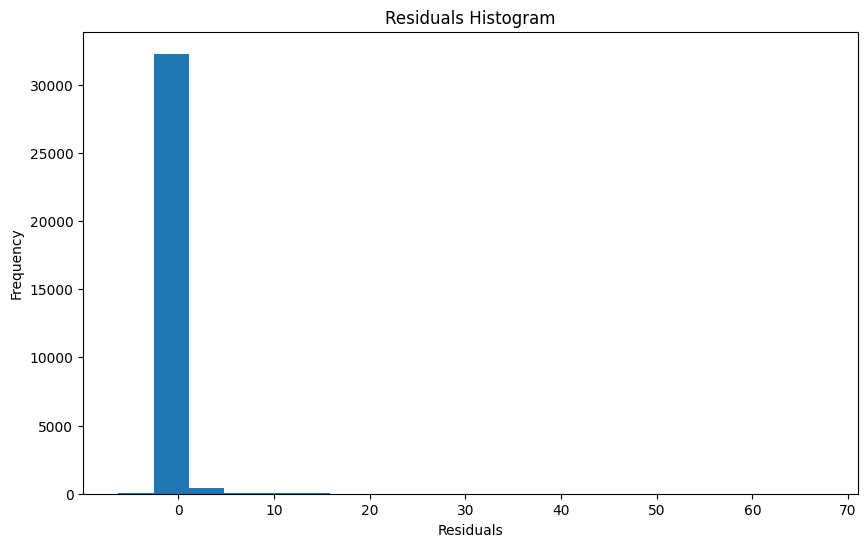

In [ ]:
# Create visualizations
# 1. Actual vs. Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()